In [69]:
import sys
import os
import cv2
from matplotlib import pyplot as plt
sys.path.insert(1, '/home/drevital')
sys.path.insert(2, '/home/drevital/cs_video_processor')
from cs_utils.config_utils.site_parameter import calibration_lib_path, CS_WORKING_RESOLUTION
import video_calibrator
import utils

In [70]:
imfolder = '/home/drevital/obstacles_classification_datasets/rgb_6/train/obstacle'
imname = '1_2031_.72_2021-08-16--18-30-39_.jpg'

In [71]:
path = calibration_lib_path
#size = CS_WORKING_RESOLUTION
size = [312, 281]
url = 'Cam2V'
calibration_path = os.path.join(path, utils.to_filename(url)+'.yml')
fs_read = cv2.FileStorage(calibration_path, cv2.FILE_STORAGE_READ)
camera_matrix = fs_read.getNode('camera_matrix').mat()
dist_coefs = fs_read.getNode('dist_coefs').mat()
calibration_size = fs_read.getNode('size').mat()
factor = size[0]/calibration_size[0]
# adjust camera matrix to wanted size
camera_matrix = camera_matrix*factor
camera_matrix[2, 2] = 1
fs_read.release()
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coefs, size, 1, size)
# use initialized maps (faster)
mapx, mapy = cv2.initUndistortRectifyMap(camera_matrix,
                                         dist_coefs,
                                         None,
                                         newcameramtx,
                                         size,
                                         cv2.CV_32FC1)
mapx_int = mapx.astype(int)
mapy_int = mapy.astype(int)

In [72]:
impath = os.path.join(imfolder, imname)
distorted = cv2.imread(impath)
w = distorted.shape[1]
ref = distorted[:, :w//2]
current = distorted[:, w//2:]
ref_undistorted = cv2.remap(ref, mapx, mapy, cv2.INTER_LINEAR)
current_undistorted = cv2.remap(current, mapx, mapy, cv2.INTER_LINEAR)

Text(0.5, 1.0, 'Current Undistorted')

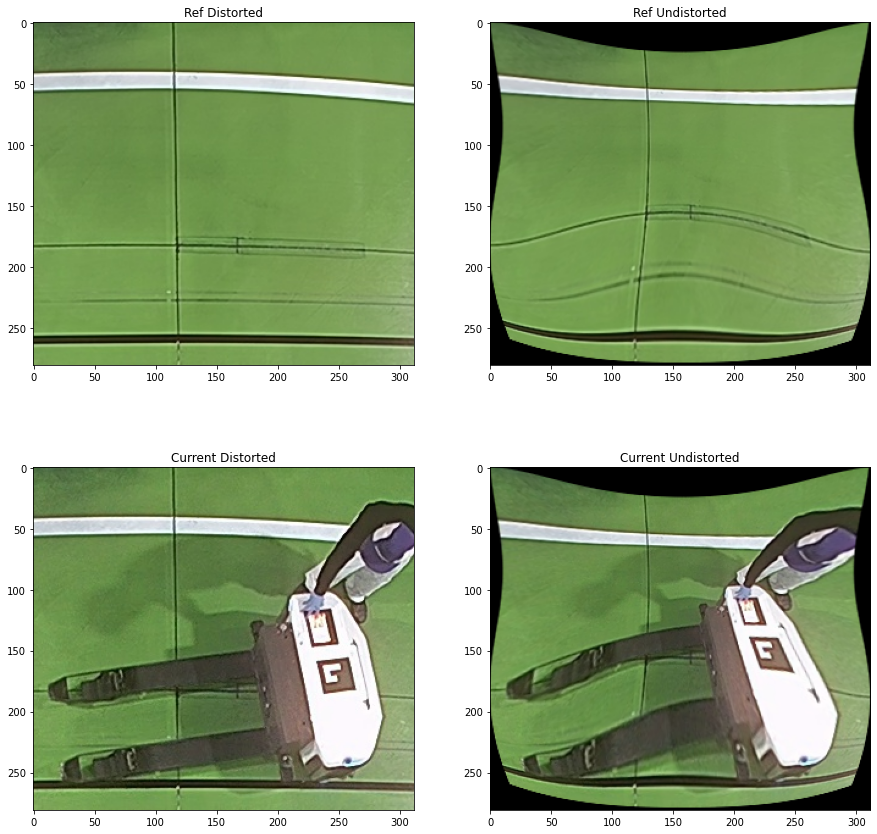

In [73]:
rows = 2
cols = 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

axes[0, 0].imshow(ref)
axes[0, 0].set_title('Ref Distorted')
axes[0, 1].imshow(ref_undistorted)
axes[0, 1].set_title('Ref Undistorted')
axes[1, 0].imshow(current)
axes[1, 0].set_title('Current Distorted')
axes[1, 1].imshow(current_undistorted)
axes[1, 1].set_title('Current Undistorted')

In [74]:
distorted.shape

(281, 624, 3)